In [2]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from ethicml.visualisation.plot import plot_mean_std_box, single_plot_mean_std_box
from ethicml.evaluators import load_results

In [4]:
tfm = "no_transform"

In [13]:
just_gp_race = load_results("Adult Race", tfm, "just_gp", set_index=True)
just_gp_sex = load_results("Adult Sex", tfm, "just_gp", set_index=True)
lr_dp_avg_no_s_race = load_results("Adult Race", tfm, "lr_dp_avg_no_s", set_index=True)
lr_dp_avg_no_s_sex = load_results("Adult Sex", tfm, "lr_dp_avg_no_s", set_index=True)
only_baselines_race = load_results("Adult Race", tfm, "only_baselines", set_index=True)
only_baselines_sex = load_results("Adult Sex", tfm, "only_baselines", set_index=True)

In [6]:
def _mapper(idx):
    dataset, transform, model, repeat = idx
    if model.startswith("LR"):
        new_name = model.replace("LR (torch), wd: 0.1, RAdam,", "ours,")
        new_name = new_name.replace("LR (torch), wd: 0.1, RAdam", "LR")
        new_name = new_name.replace("TPR_t", "$TPR_t$")
        new_name = new_name.replace("TNR_t", "$TNR_t$")
        return dataset, transform, new_name, repeat
    return idx
def beautify(results):
    results_mapped = results.copy()
    results_mapped.index = results_mapped.index.map(_mapper)
    return results_mapped

In [14]:
dp_race = pd.concat([
    just_gp_race,
    lr_dp_avg_no_s_race,
    only_baselines_race.query('model != "LRCV" & model != "ZafarFairness, c=0.001" & model != "Logistic Regression, C=1.0"'),
], sort=False)
dp_sex = pd.concat([
    just_gp_sex,
    lr_dp_avg_no_s_sex,
    only_baselines_sex.query('model != "LRCV" & model != "ZafarFairness, c=0.001" & model != "Logistic Regression, C=1.0"'),
], sort=False)

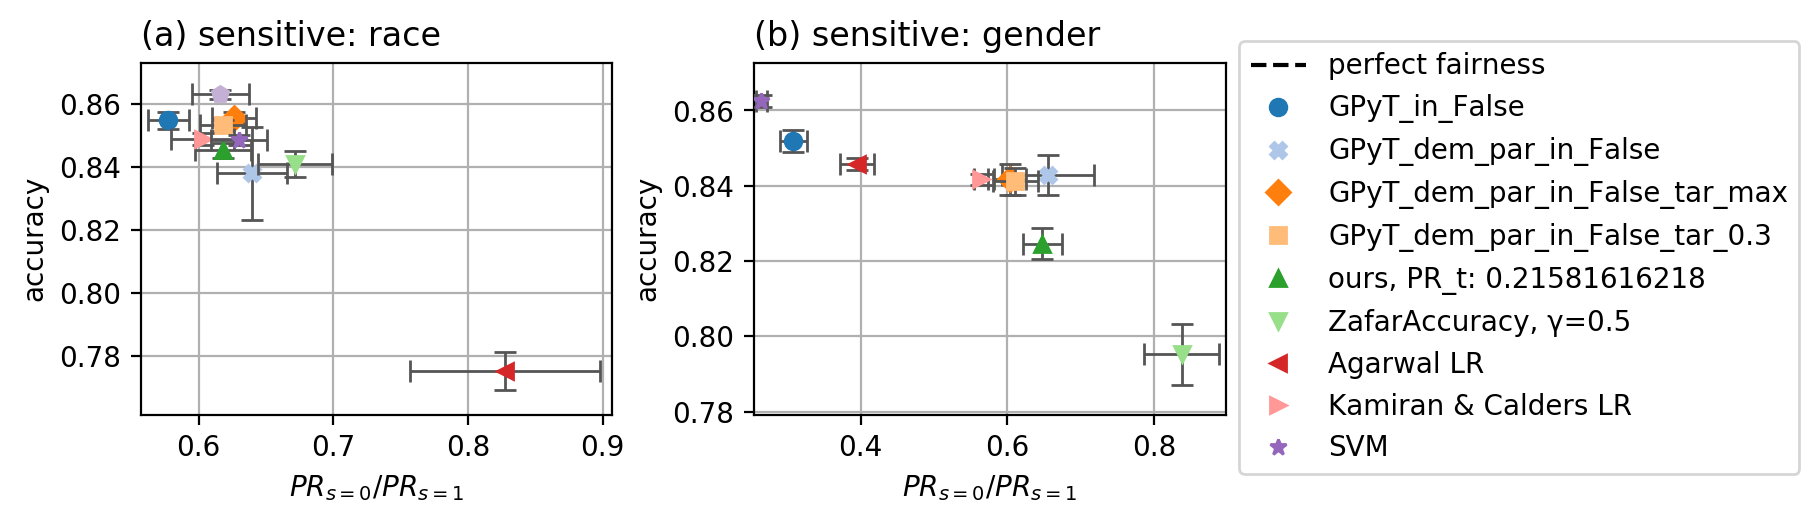

In [15]:
fig, plots = plt.subplots(ncols=2, figsize=(7, 2), dpi=200)

plots[0].axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot_mean_std_box(
    plots[0], beautify(dp_race),
    yaxis=("Accuracy", "accuracy"),
    xaxis=("prob_pos_race_White_0/race_White_1", "$PR_{s=0}/PR_{s=1}$"),
    dataset="Adult Race",
    transform=tfm,
    legend=None,
    use_cross=True,
)
plots[0].set_title("", loc='center')
plots[0].set_title("(a) sensitive: race", loc='left')

plots[1].axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
legends = single_plot_mean_std_box(
    plots[1], beautify(dp_sex),
    yaxis=("Accuracy", "accuracy"),
    xaxis=("prob_pos_sex_Male_0/sex_Male_1", "$PR_{s=0}/PR_{s=1}$"),
    dataset="Adult Sex",
    transform=tfm,
    legend=("outside", 1.1),
    use_cross=True,
)
plots[1].set_title("", loc='center')
plots[1].set_title("(b) sensitive: gender", loc='left')

# fig.tight_layout()
fig.subplots_adjust(bottom=0, wspace=0.3)
fig.savefig("plots/gp_tradeoff.pdf",
            dpi=200, bbox_extra_artists=[legends], bbox_inches='tight', pad_inches=0)
# fig

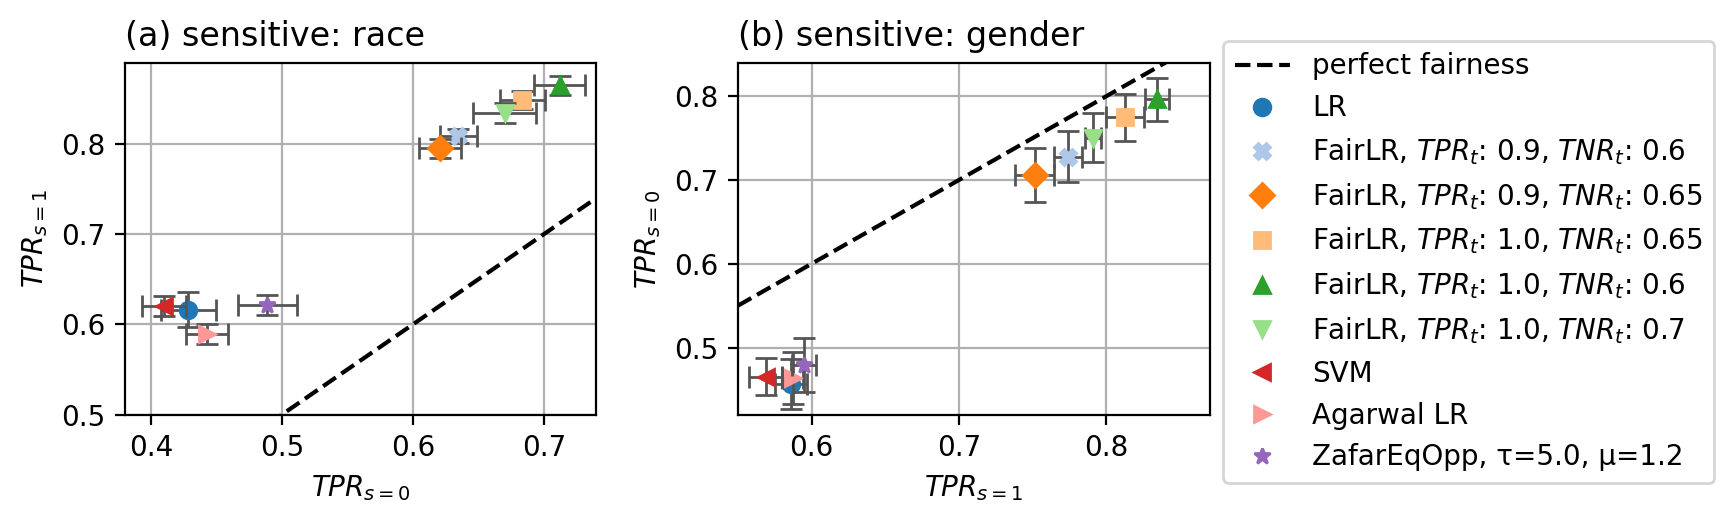

In [17]:
fig, plots = plt.subplots(ncols=2, figsize=(7, 2), dpi=200)

plots[0].plot([0.0, 1.0], [0.0, 1.0], 'k--', label="perfect fairness")
single_plot_mean_std_box(
    plots[0], beautify(eo_race),
    yaxis=("TPR_race_0", "$TPR_{s=1}$"),
    xaxis=("TPR_race_1", "$TPR_{s=0}$"),
    dataset="Compas Race",
    transform=tfm,
    legend=None,
    use_cross=True,
)
plots[0].set_title("", loc='center')
plots[0].set_title("(a) sensitive: race", loc='left')
plots[0].set_xlim(0.38, 0.74)
plots[0].set_ylim(0.50, 0.89)

plots[1].plot([0.0, 1.0], [0.0, 1.0], 'k--', label="perfect fairness")
legends = single_plot_mean_std_box(
    plots[1], beautify(eo_sex),
    yaxis=("TPR_sex_0", "$TPR_{s=0}$"),
    xaxis=("TPR_sex_1", "$TPR_{s=1}$"),
    dataset="Compas Sex",
    transform=tfm,
    legend=("outside", 1.1),
    use_cross=True,
)
plots[1].set_title("", loc='center')
plots[1].set_title("(b) sensitive: gender", loc='left')
plots[1].set_xlim(0.55, 0.87)
plots[1].set_ylim(0.42, 0.84)

# fig.tight_layout()
fig.subplots_adjust(bottom=0, wspace=0.3)
fig.savefig("plots/eo_tpr_tpr.pdf",
            dpi=200, bbox_extra_artists=[legends], bbox_inches='tight', pad_inches=0)
# fig

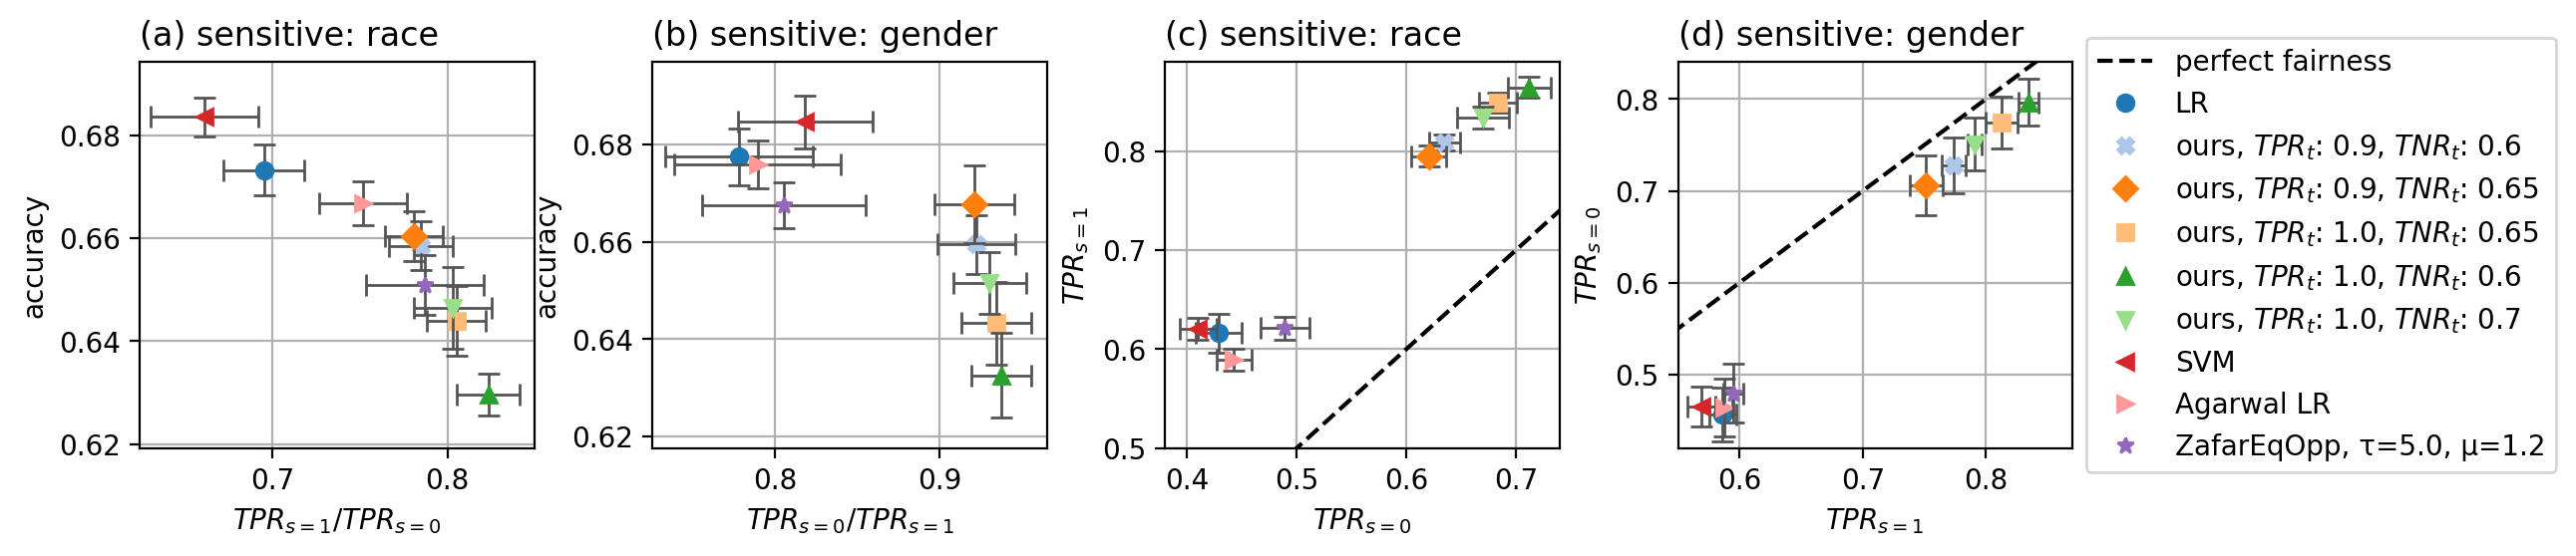

In [25]:
fig, plots = plt.subplots(ncols=4, figsize=(12.5, 2.2), dpi=200)

plots[0].axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot_mean_std_box(
    plots[0], beautify(eo_race),
    yaxis=("Accuracy", "accuracy"),
    xaxis=("TPR_race_0/race_1", "$TPR_{s=1}/TPR_{s=0}$"),
    dataset="Compas Race",
    transform=tfm,
    legend=None,
    use_cross=True,
)
plots[0].set_title("", loc='center')
plots[0].set_title("(a) sensitive: race", loc='left')

plots[1].axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
legends = single_plot_mean_std_box(
    plots[1], beautify(eo_sex),
    yaxis=("Accuracy", "accuracy"),
    xaxis=("TPR_sex_0/sex_1", "$TPR_{s=0}/TPR_{s=1}$"),
    dataset="Compas Sex",
    transform=tfm,
    legend=None,  # ("outside", 1.1),
    use_cross=True,
)
plots[1].set_title("", loc='center')
plots[1].set_title("(b) sensitive: gender", loc='left')

# ==============

plots[2].plot([0.0, 1.0], [0.0, 1.0], 'k--', label="perfect fairness")
single_plot_mean_std_box(
    plots[2], beautify(eo_race),
    yaxis=("TPR_race_0", "$TPR_{s=1}$"),
    xaxis=("TPR_race_1", "$TPR_{s=0}$"),
    dataset="Compas Race",
    transform=tfm,
    legend=None,
    use_cross=True,
)
plots[2].set_title("", loc='center')
plots[2].set_title("(c) sensitive: race", loc='left')
plots[2].set_xlim(0.38, 0.74)
plots[2].set_ylim(0.50, 0.89)

plots[3].plot([0.0, 1.0], [0.0, 1.0], 'k--', label="perfect fairness")
legends = single_plot_mean_std_box(
    plots[3], beautify(eo_sex),
    yaxis=("TPR_sex_0", "$TPR_{s=0}$"),
    xaxis=("TPR_sex_1", "$TPR_{s=1}$"),
    dataset="Compas Sex",
    transform=tfm,
    legend=("outside", 1.1),
    use_cross=True,
)
plots[3].set_title("", loc='center')
plots[3].set_title("(d) sensitive: gender", loc='left')
plots[3].set_xlim(0.55, 0.87)
plots[3].set_ylim(0.42, 0.84)

# fig.tight_layout()
fig.subplots_adjust(bottom=0, wspace=0.3)
fig.savefig("plots/eo_together.pdf",
            dpi=200, bbox_extra_artists=[legends], bbox_inches='tight', pad_inches=0)
# fig

In [ ]:
plot_mean_std_box(results.query('~model.str.contains("True")'), "Accuracy", "TPR_race_0/race_1", save=False, use_cross=True)[0][0]

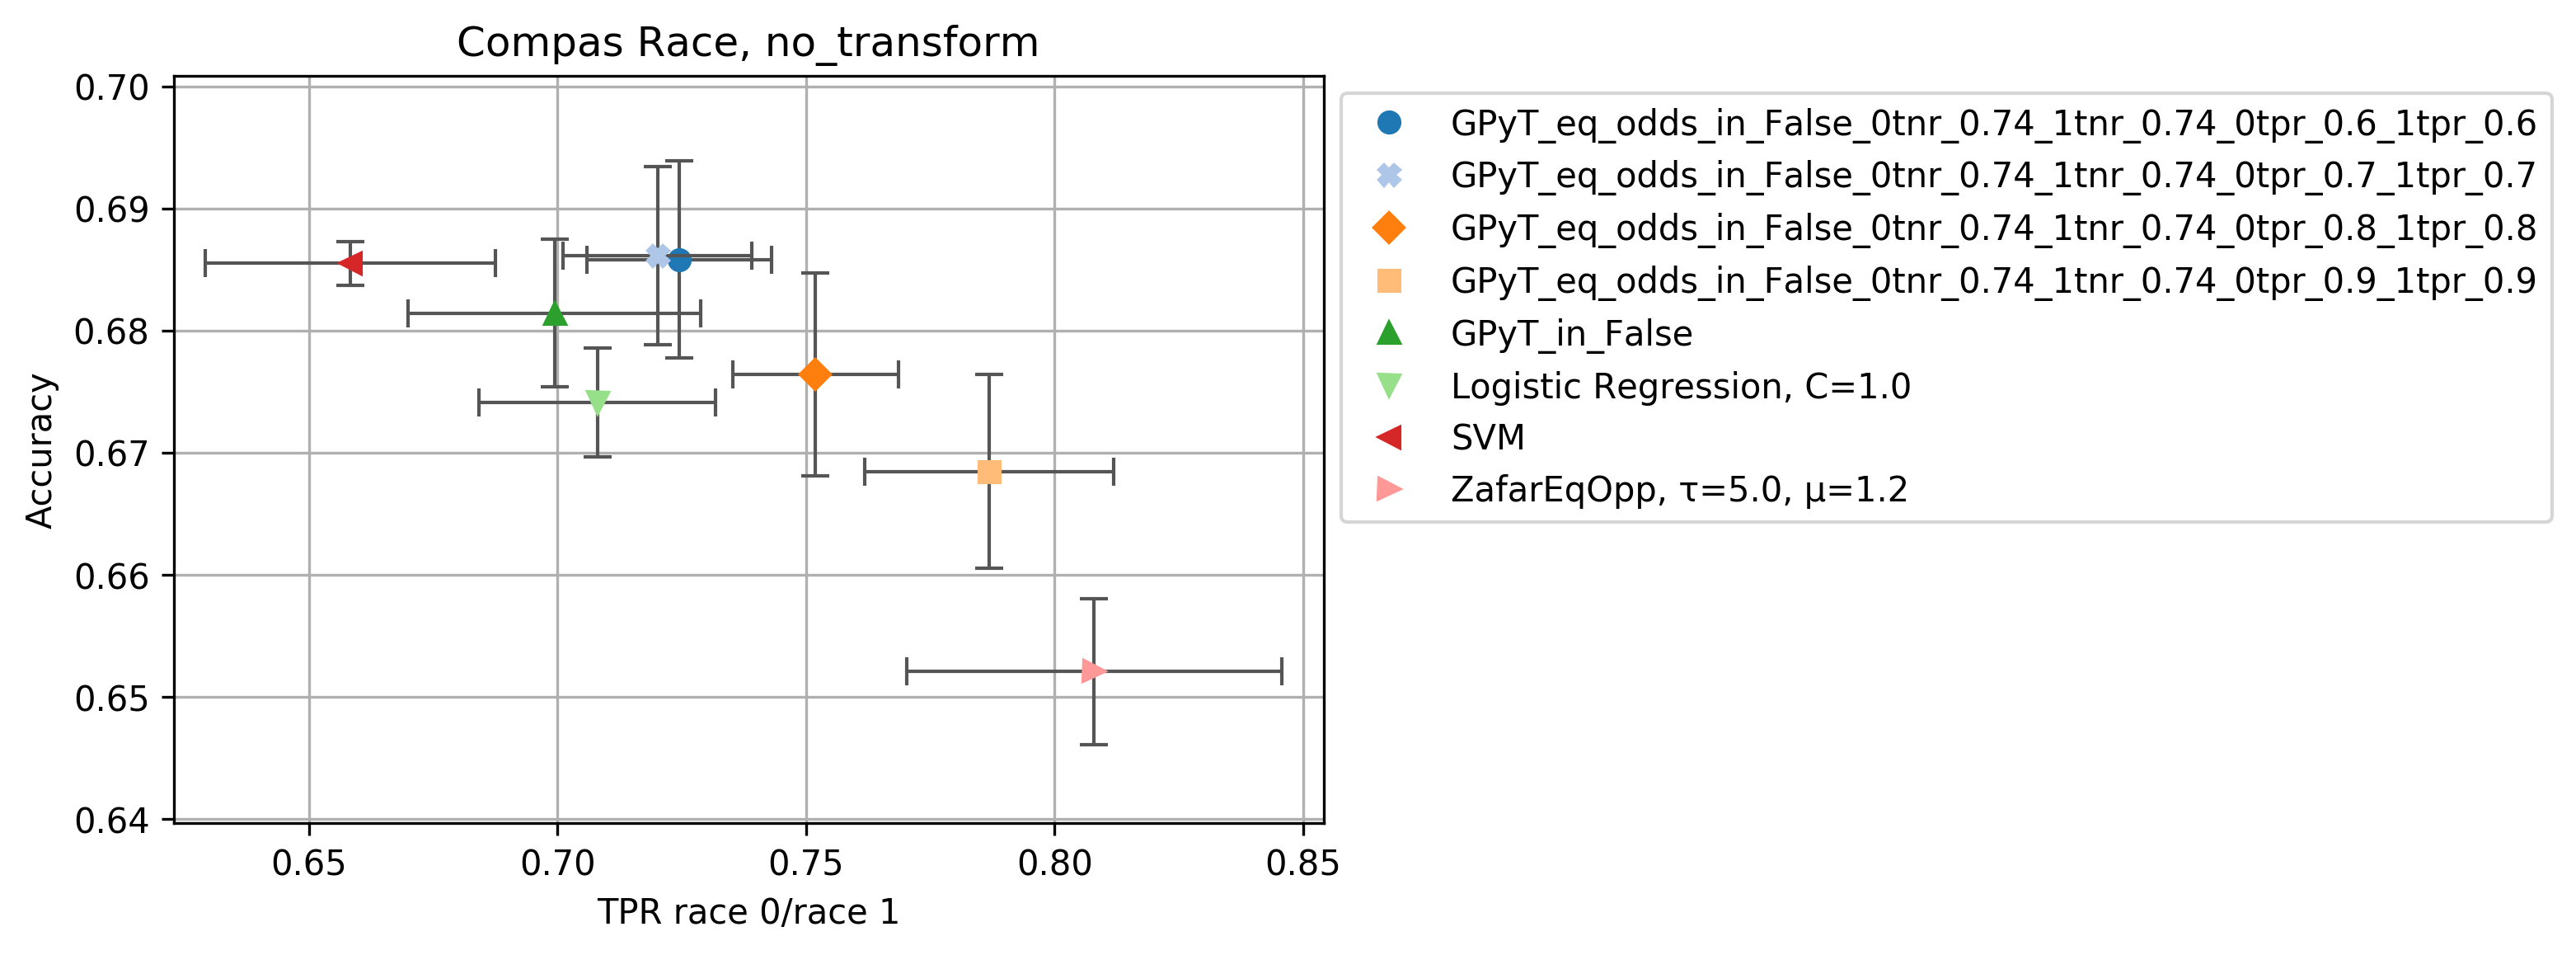

In [56]:
plot_mean_std_box(results.query('~model.str.contains("True")'), "Accuracy", "TPR_sex_0/sex_1", save=False, use_cross=True)[0][0]

In [6]:
use_s = False
test_results = evaluate_models_parallel(
    datasets=data,
    inprocess_models=[
        LrTorch(use_s=use_s),

#         LrTorch(fair=True, debiasing_args=EOFlags(p_ybary1_s0=.9, p_ybary1_s1=.9, p_ybary0_s0=.6, p_ybary0_s1=.6), use_s=use_s),
#         LrTorch(fair=True, debiasing_args=EOFlags(p_ybary1_s0=.9, p_ybary1_s1=.9, p_ybary0_s0=.65, p_ybary0_s1=.65), use_s=use_s),
#         LrTorch(fair=True, debiasing_args=EOFlags(p_ybary1_s0=1., p_ybary1_s1=1., p_ybary0_s0=.65, p_ybary0_s1=.65), use_s=use_s),
#         LrTorch(fair=True, debiasing_args=EOFlags(p_ybary1_s0=1., p_ybary1_s1=1., p_ybary0_s0=.6, p_ybary0_s1=.6), use_s=use_s),
#         LrTorch(fair=True, debiasing_args=EOFlags(p_ybary1_s0=1., p_ybary1_s1=1., p_ybary0_s0=.7, p_ybary0_s1=.7), use_s=use_s),
    ],
    metrics=[Accuracy(), TPR(), TNR()],
    per_sens_metrics=[TPR(), TNR()],
    repeats=1,
    topic="tests",
    proportional_splits=True,
    max_parallel=2,
)

100%|██████████| 2/2 [00:31<00:00, 15.83s/it, model=LR (torch), wd: 0.1, RAdam, dataset=Compas Sex - Train, worker_id=1]
